**Time Series Forecasting**

Time Series Forecasting is a statistical technique used to predict future values of a time series based on past observations. In simpler terms, it's like looking into the future of data points plotted over time. By analyzing patterns and trends in historical data, Time Series Forecasting helps make informed predictions about what may happen next, assisting in decision-making and planning for the future.

**Different Time Series Forecasting Algorithms**

**1. Autoregressive (AR) Model:** Autoregressive (AR) model is a type of time series model that predicts future values based on linear combinations of past values of the same time series. In an AR(p) model, the current value of the time series is modeled as a linear function of its previous p values, plus a random error term. The order of the autoregressive model (p) determines how many past values are used in the prediction.

**2. Autoregressive Integrated Moving Average (ARIMA):** ARIMA is a widely used statistical method for time series forecasting. It models the next value in a time series based on linear combination of its own past values and past forecast errors. The model parameters include the order of autoregression (p), differencing (d), and moving average (q).

**3. ARIMAX:** ARIMA model extended to include exogenous variables that can improve forecast accuracy.

**4. Seasonal Autoregressive Integrated Moving Average (SARIMA):** SARIMA extends ARIMA by incorporating seasonality into the model. It includes additional seasonal parameters (P, D, Q) to capture periodic fluctuations in the data.

**5. SARIMAX:** Extension of SARIMA that incorporates exogenous variables for seasonal time series forecasting.

**6. Vector Autoregression (VAR) Models:** VAR models extend autoregression to multivariate time series data by modeling each variable as a linear combination of its past values and the past values of other variables. They are suitable for analyzing and forecasting interdependencies among multiple time series.

**7. Theta Method:** A simple and intuitive forecasting technique based on extrapolation and trend fitting.

**8. Exponential Smoothing Methods:** Exponential smoothing methods, such as Simple Exponential Smoothing (SES) and Holt-Winters, forecast future values by exponentially decreasing weights for past observations. These methods are particularly useful for data with trend and seasonality.

**9. Gaussian Processes Regression:** Gaussian Processes Regression is a Bayesian non-parametric approach that models the distribution of functions over time. It provides uncertainty estimates along with point forecasts, making it useful for capturing uncertainty in time series forecasting.

**10. Generalized Additive Models (GAM):** A flexible modeling approach that combines additive components, allowing for nonlinear relationships and interactions.

**11. Random Forests:** Random Forests is a machine learning ensemble method that constructs multiple decision trees during training and outputs the average prediction of the individual trees. It can handle complex relationships and interactions in the data, making it effective for time series forecasting.

**12. Gradient Boosting Machines (GBM):** GBM is another ensemble learning technique that builds multiple decision trees sequentially, where each tree corrects the errors of the previous one. It excels in capturing nonlinear relationships and is robust against overfitting.

**13. State Space Models:** State space models represent a time series as a combination of unobserved (hidden) states and observed measurements. These models capture both the deterministic and stochastic components of the time series, making them suitable for forecasting and anomaly detection.

**14. Dynamic Linear Models (DLMs):** DLMs are Bayesian state-space models that represent time series data as a combination of latent state variables and observations. They are flexible models capable of incorporating various trends, seasonality, and other dynamic patterns in the data.

**15. Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) Networks:** RNNs and LSTMs are deep learning architectures designed to handle sequential data. They can capture complex temporal dependencies in time series data, making them powerful tools for forecasting tasks, especially when dealing with large-scale and high-dimensional data.

**16. Hidden Markov Model (HMM):** A Hidden Markov Model (HMM) is a statistical model used to describe sequences of observable events generated by underlying hidden states. In time series, HMMs infer hidden states from observed data, capturing dependencies and transitions between states. They are valuable for tasks like speech recognition, gesture analysis, and anomaly detection, providing a framework to model complex sequential data and extract meaningful patterns

**Autoregressive models (AR models)** are a concept in time series analysis and forecasting that captures the relationship between an observation and several lagged observations i.e previous time steps. Its idea is that the current value of a time series data can be expressed as a linear combination of its past values with some random noise.

**Mathematical Explanation**
Mathematically, autoregressive model of order p, denoted as AR(p) and can be expressed as:

$ X_t=c+\phi_1 X_{t−1}+\phi_2 X_{t−2}+…+\phi_p X_{t−p}+\epsilon_t X_t​ ​$

Where:
- $X_t$​ is the value at time t.
- $c$ is a constant.
- $\phi_1, \phi_2,…,\phi_p​$ are the model parameters.
- $X_{t−1},X_{t−2},…,X_{t−p}$​ are the lagged values.
- $\epsilon_t$​ represents white noise or random error at time tt.

**Working of Autoregressive (AR) Model**
Autocorrelation Function (ACF) in Autoregressive Models is the one that measures the correlation between a time series and its past lagged values. Its working is as follows:

**1. Understanding Lag and Temporal Dependence**
A lag represents the number of time steps by which the series is shifted. For example:
- Lag 1 compares each value with the one immediately preceding it.
- Lag 2 compares values with those two time steps earlier, and so on.

The autocorrelation coefficient at a specific lag quantifies this relationship:
- A high autocorrelation indicates a strong connection between the present and the past value at that lag.
- A low or near-zero autocorrelation suggests weak or no temporal dependence.

**2. Visualizing Autocorrelation using ACF Plot**
To analyze autocorrelation patterns, we use an ACF plot which displays autocorrelation values across various lags:
- The x-axis shows the lag values.
- The y-axis shows the autocorrelation coefficients.
- Peaks that lie outside the confidence bounds (usually shaded) indicate statistically significant correlations.

Such patterns help reveal the underlying temporal structure of the data and guide the selection of an appropriate lag order in AR models.

**3. Role of ACF in AR Model Selection**
The ACF helps determine how many past time steps (lags) should be included in the model. Typically you will look at the ACF plot along with a Partial Autocorrelation Function (PACF) plot to choose a suitable lag order.
It also helps assess whether a time series is stationary which means its statistical properties like mean and variance stay consistent over time. In a stationary series autocorrelations typically decrease gradually as lag increases. If autocorrelations persist or decay slowly it may indicate non-stationarity suggesting that the series needs transformation before modeling.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
df = pd.read_csv("Weather_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df["Temperature"] = df["Temperature"].interpolate()
result = adfuller(df["Temperature"])
print(f"ADF statistic = {result[0]:.3f}, p-value = {result[1]:.3f}")
df_diff = df["Temperature"].diff().dropna()

ADF statistic = -1.096, p-value = 0.716


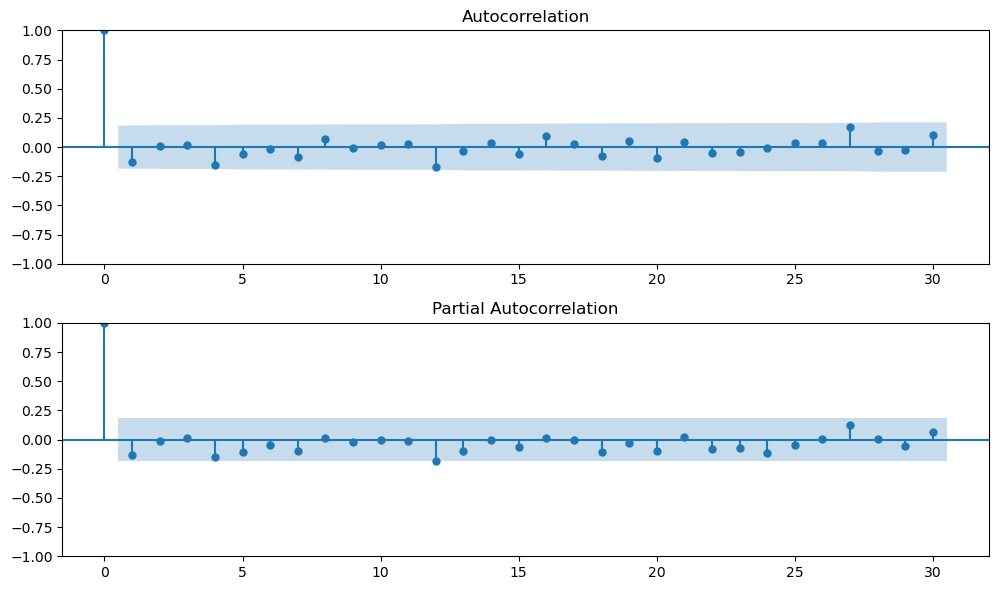

In [5]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
plot_acf(df_diff, lags=30, ax=ax[0])
plot_pacf(df_diff, lags=30, ax=ax[1])
plt.tight_layout()
plt.show()

In [6]:
# splitting the Weather_data

n = len(df_diff)
train_end = int(n * 0.8)
train = df_diff.iloc[:train_end]
test = df_diff.iloc[train_end:]

In [7]:
# Model fitting
p = 13
model = AutoReg(train, lags=p, old_names=False)
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:            Temperature   No. Observations:                   90
Model:                    AutoReg(13)   Log Likelihood                -146.481
Method:               Conditional MLE   S.D. of innovations              1.622
Date:                Tue, 05 Aug 2025   AIC                            322.963
Time:                        15:53:19   BIC                            358.120
Sample:                    01-15-2017   HQIC                           337.025
                         - 04-01-2017                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4366      0.210      2.080      0.038       0.025       0.848
Temperature.L1     -0.1673      0.113     -1.479      0.139      -0.389       0.054
Temperature.L2     -0.0804      

c:\Users\vsharma.A123SYSTEMSEU\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [8]:
# predictions from the model
pred_train = model_fit.predict(start=train.index[p], end=train.index[-1], dynamic=False)
pred_test = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

rmse = np.sqrt(mean_squared_error(test, pred_test))
mae = mean_absolute_error(test, pred_test)
print(rmse, mae,sep="\n")

1.3502853217579163
1.064373117847641


c:\Users\vsharma.A123SYSTEMSEU\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


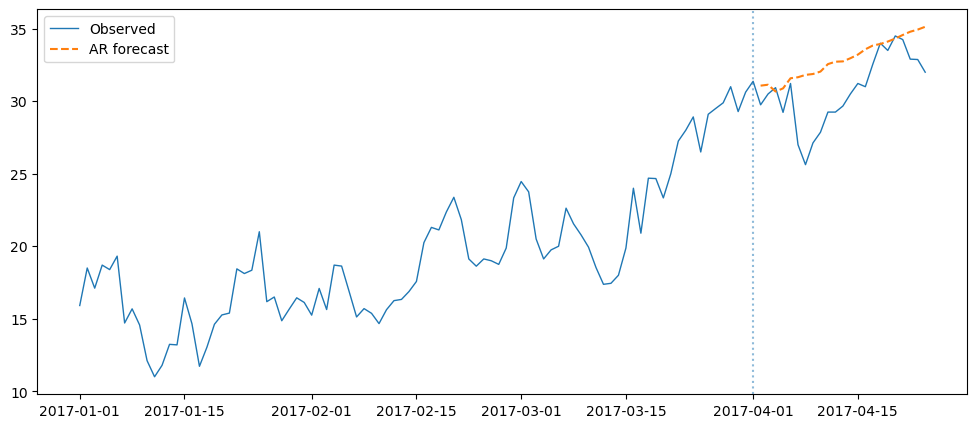

In [9]:
last_train_value = df["Temperature"].iloc[train_end]
forecast_orig = pred_test.cumsum() + last_train_value
forecast_orig.index = test.index

plt.figure(figsize=(12,5))
plt.plot(df["Temperature"], label="Observed", linewidth=1)
plt.plot(forecast_orig, label="AR forecast", linestyle="--")
plt.axvline(df.index[train_end], alpha=0.5, linestyle=":")
plt.legend()
plt.show()

In [78]:
# Simple AutoRegressive Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Load dataset
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Fit AR model
model = AutoReg(data['#Passengers'], lags=1)
model_fit = model.fit()
print(model_fit.summary())

# Forecast
predictions = model_fit.predict(start=len(data), end=len(data)+11)
print(predictions)

                            AutoReg Model Results                             
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                     AutoReg(1)   Log Likelihood                -704.106
Method:               Conditional MLE   S.D. of innovations             33.277
Date:                Thu, 07 Aug 2025   AIC                           1414.212
Time:                        17:09:56   BIC                           1423.100
Sample:                    02-01-1949   HQIC                          1417.823
                         - 12-01-1960                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.7055      7.084      1.935      0.053      -0.178      27.589
#Passengers.L1     0.9589      0.023     41.106      0.000       0.913       1.005
                                    

#### ARIMA Model for Time Series Forecasting
**ARIMA** stands for autoregressive integrated moving average model and is specified by three order parameters:
$(p, d, q)$.
- **AR(p) Autoregression** - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.
- **I(d) Integration** - uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
- **MA(q) Moving Average** - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

Types of ARIMA Model
- **ARIMA** : Non-seasonal Autoregressive Integrated Moving Averages
- **SARIMA**:Seasonal ARIMA
- **SARIMAX** : Seasonal ARIMA with exogenous variables

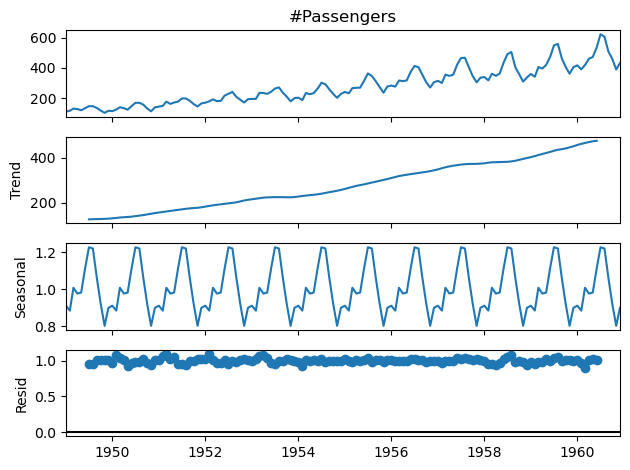

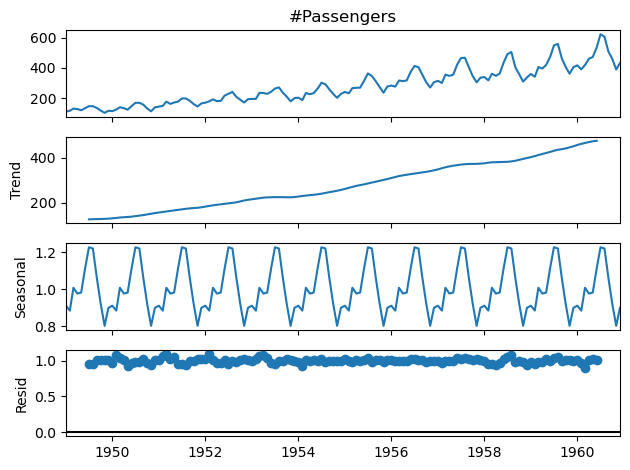

In [24]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the AirPassengers dataset
airline = pd.read_csv('AirPassengers.csv',
                       index_col ='Month',
                       parse_dates = True)

# Print the first five rows of the dataset
#airline.head()
# ETS Decomposition
result = seasonal_decompose(airline['#Passengers'], 
                            model ='multiplicative')
# ETS plot 
result.plot()

In [25]:
# To install the library
# ! pip install pmdarima

# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.75 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.44 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.19 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.40 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.57 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.36 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.08 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.98 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 05 Aug 2025   AIC                           1019.178
Time:                                     16:42:45   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['#Passengers'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.016
Date:                            Tue, 05 Aug 2025   AIC                            896.033
Time:                                    16:42:52   BIC                            909.928
Sample:                                01-01-1949   HQIC                           901.675
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2981      0.076     -3.907      0.000      -0.448      -0.149
ar.S.L12       0.7090      0.236      3.003      0.003       0.246       1.172
ar.S.L24       0.2898      0.100      2.885      0.004       0.093       0.487
ma.S.L12      -0.9767      1.893     -0.516      0.606      -4.687       2.733
sigma2        88.5453    147.802      0.599      0.549    -201.141     378.231
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

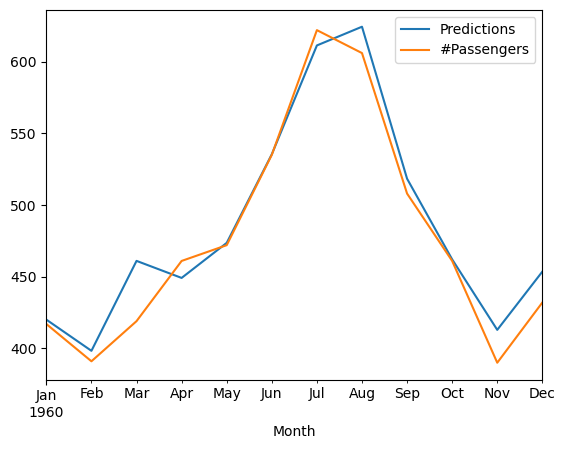

In [27]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['#Passengers'].plot(legend = True)

<Axes: xlabel='Month'>

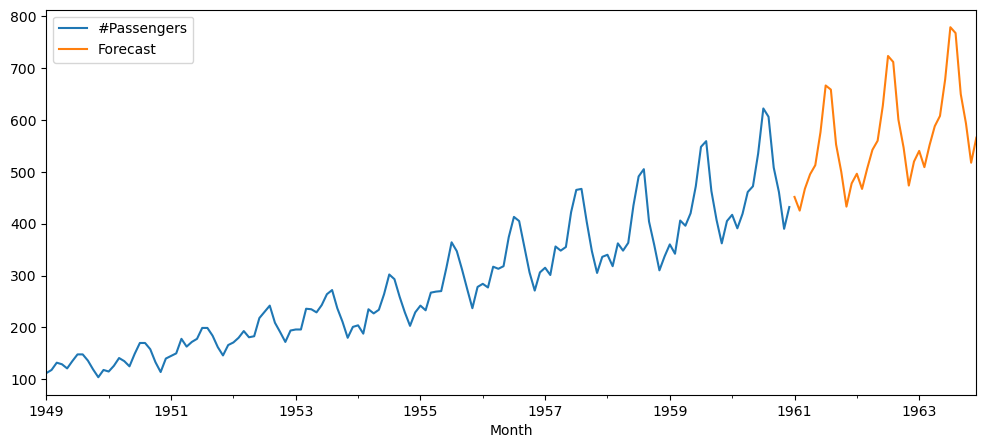

In [28]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["#Passengers"], predictions)

# Calculate mean squared error
mean_squared_error(test["#Passengers"], predictions)
# Train the model on the full dataset
model = model = SARIMAX(airline['#Passengers'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(airline), 
                          end = (len(airline)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')

# Plot the forecast values
airline['#Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [79]:
# Simple ARIMA model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Fit ARIMA model
model = ARIMA(data['#Passengers'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=12)
print(forecast)

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Thu, 07 Aug 2025   AIC                           1394.683
Time:                        17:10:58   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

#### SARIMA

SARIMA, which stands for Seasonal Autoregressive Integrated Moving Average, is a versatile and widely used time series forecasting model. It's an extension of the non-seasonal ARIMA model, designed to handle data with seasonal patterns. SARIMA captures both short-term and long-term dependencies within the data, making it a robust tool for forecasting. It combines the concepts of autoregressive (AR), integrated (I), and moving average (MA) models with seasonal components.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
df=pd.read_csv('Dataset- Superstore (2015-2018).csv')
sales_data=df[['Order Date','Sales']]
sales_data=pd.DataFrame(sales_data)
sales_data['Order Date']=pd.to_datetime(sales_data['Order Date'])
print(sales_data.head())
df1 = sales_data.set_index('Order Date')

monthly_sales = df1.resample('M').mean()
monthly_sales.head()

  Order Date     Sales
0 2016-11-08  261.9600
1 2016-11-08  731.9400
2 2016-06-12   14.6200
3 2015-10-11  957.5775
4 2015-10-11   22.3680


,Sales
Order Date,
2014-01-31,180.213861
2014-02-28,98.258522
2014-03-31,354.719803
2014-04-30,209.595148
2014-05-31,193.838418


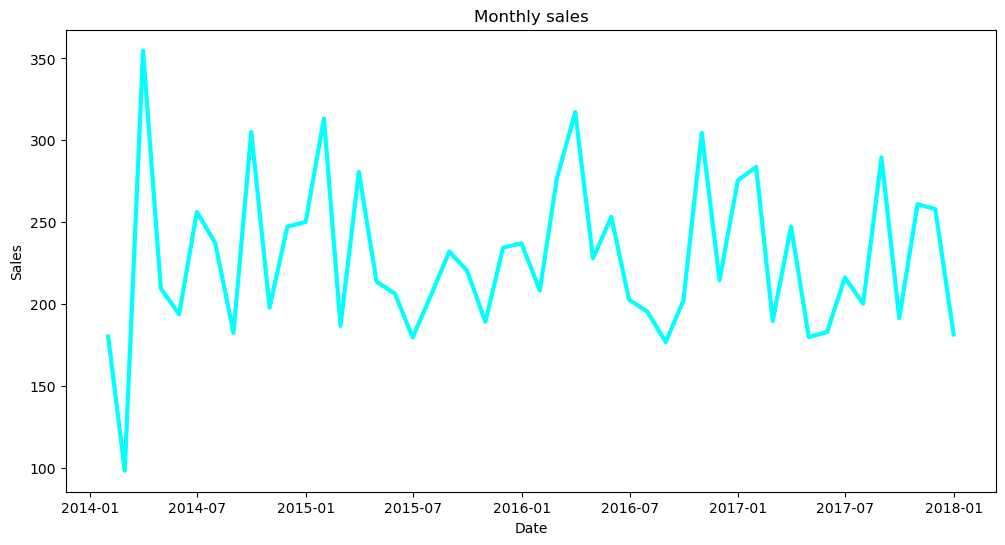

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Sales'], linewidth=3,c='cyan')
plt.title("Monthly sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [32]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(monthly_sales['Sales'])

ADF Statistic: -3.2865668298704183
p-value: 0.015489720191097848
Stationary


#### Identify Model Parameters

Identify the SARIMA model parameters (p, d, q, P, D, Q, s) using ACF and PACF plots.

- ACF Plot: This function generates an ACF plot, which is a plot of autocorrelations of the differenced time series. Autocorrelation measures the relationship between a data point and previous data points at different lags.
- PACF Plot: This function generates a PACF plot, which is a plot of partial autocorrelations of the differenced time series. Partial autocorrelation represents the correlation between a data point and a lag while adjusting for the influence of other lags.

In [ ]:
# Plot ACF and PACF
plot_acf(monthly_sales)
plot_pacf(monthly_sales)
plt.show()

Here, both plots have a horizontal axis that shows the lags, and a vertical axis representing correlation coefficients ranging from -1 to 1 where -1 means perfect negative correlation, 0 means no correlation and 1 means perfect positive correlation.

The blue shaded area represents confidence interval for the correlation coefficients. **If the correlation coefficient at a certain lag is outside the confidence interval, it means that the correlation coefficient is statistically significant and not due to chance.**

**Fit the SARIMA Model**

Now, fit the SARIMA model using the identified parameters.

- **SARIMA Parameters**: These parameters define the SARIMA model. p, d, and q represent the non-seasonal order, and P, D, Q, and s represent the seasonal order. For example, p is the autoregressive (AR) order, d is the differencing order, and s is the seasonality (in this case, 12 for monthly seasonality).
- **Fitting the SARIMA Model**: Here, a SARIMAX model is created using the defined parameters. The SARIMAX function takes the sales data and the specified order and seasonal_order parameters. The fit method is then called to estimate the model's coefficients based on the data

In [33]:
# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(monthly_sales, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

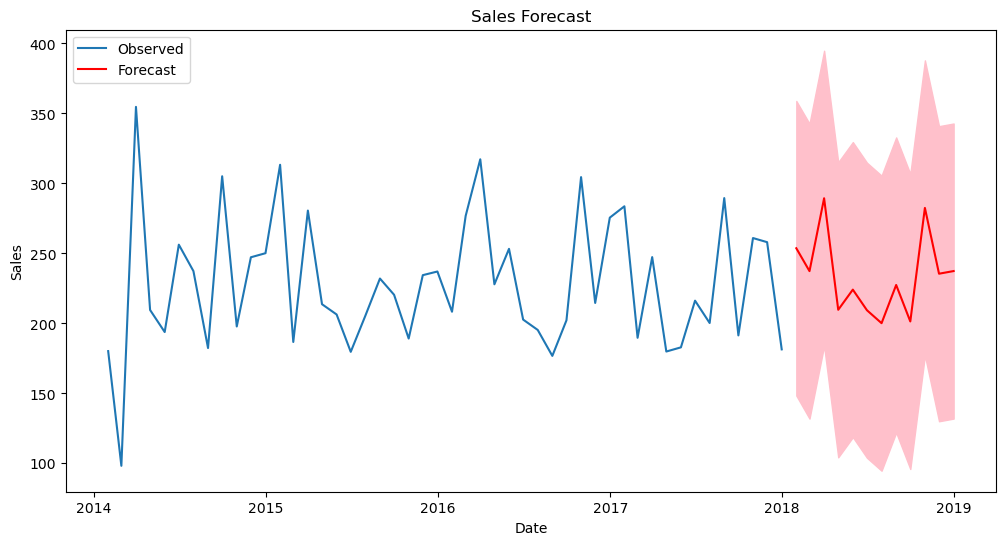

In [34]:
# Forecast future values
forecast_periods = 12  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

#### Evaluate the Model

Let's evaluate the forecasted sales values by comparing them to the observed sales data using two common metrics for this evaluation: Mean Absolute Error (MAE) and Mean Squared Error (MSE).

- **MAE (Mean Absolute Error)** measures the average absolute difference between the observed and forecasted values. It provides a simple and easily interpretable measure of the model's accuracy.
- **MSE (Mean Squared Error)** measures the average of the squared differences between the observed and forecasted values. MSE gives more weight to large errors and is sensitive to outliers.
- Lower values indicate better performance.

In [35]:
observed = monthly_sales[-forecast_periods:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 30.815717973728
MSE: 1302.5173122918209


### SARIMAX 

In [45]:
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller

import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
df = pd.read_csv('AirPassengers.csV')

df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
df = df.set_index(['Month'])

In [40]:
df['#Passengers_diff'] = df['#Passengers'].diff(periods=12)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #Passengers       144 non-null    int64  
 1   #Passengers_diff  132 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.4 KB


In [41]:
df['#Passengers_diff'].fillna(method='backfill', inplace=True)

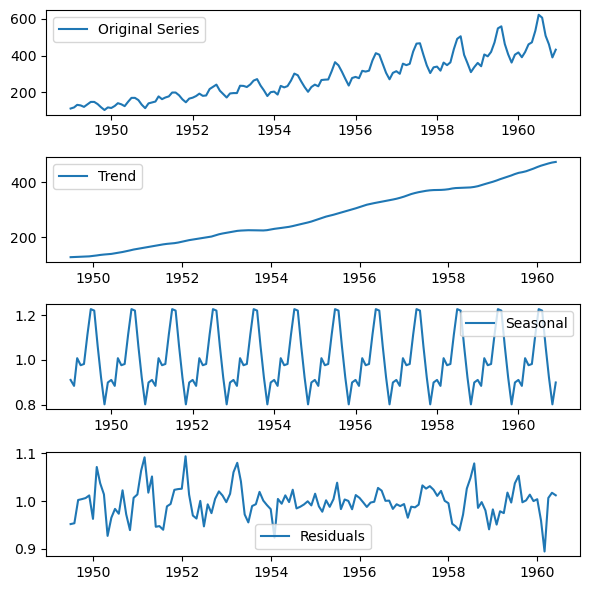

In [42]:
result = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(6,6))

plt.subplot(4, 1, 1)
plt.plot(df['#Passengers'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

- The top subplot shows the original time series, which represents the monthly passenger counts over time.
- The second subplot displays the trend component extracted from the original series. The trend represents the long-term movement or pattern in the data, smoothing out short-term fluctuations helping to identify the overall direction of the time series.
- The third subplot represents the seasonal component, capturing the repeating patterns or cycles in the data that occur at regular intervals indicating monthly seasonality helping to understand the regular fluctuations that happen at specific times each year.
- The bottom subplot shows the residuals or the remainder after removing the trend and seasonal components.

#### Exogenous variable

Create an exogenous variable 'month_index' representing the month from the datetime index. This will be used as an exogenous variable in the SARIMAX model.

In [43]:
df['month_index'] = df.index.month

In [46]:
SARIMAX_model = pm.auto_arima(df[['#Passengers']], exogenous=df[['month_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

In [50]:
def sarimax_forecast(SARIMAX_model, periods=24):
    # Forecast
    n_periods = periods

    forecast_df = pd.DataFrame({'month_index': pd.date_range(df.index[-1], periods=n_periods, freq='MS').month},
                               index=pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods,
                                            return_conf_int=True,
                                            exogenous=forecast_df[['month_index']])
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15, 7))
    plt.plot(df['#Passengers'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index,
                     lower_series,
                     upper_series,
                     color='k', alpha=.15)

    plt.title('SARIMAX - Forecast of Airline Passengers')
    plt.show()

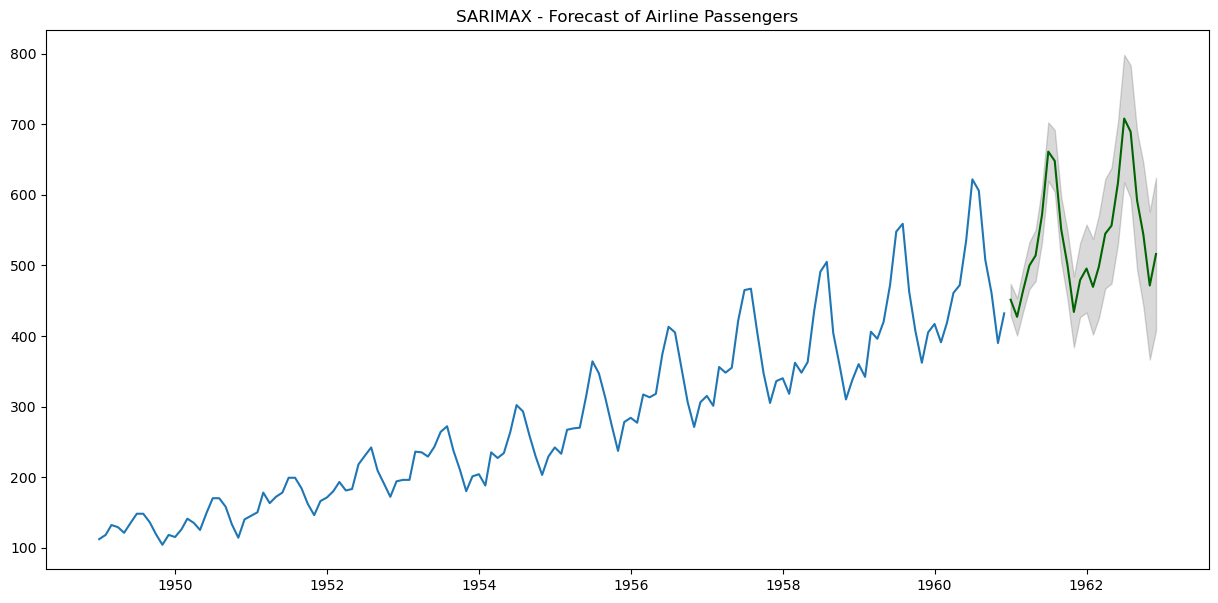

In [51]:
sarimax_forecast(SARIMAX_model, periods=24)

In [80]:
# Simple SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Fit SARIMAX model
model = SARIMAX(data['#Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12), exog=None)
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=12, exog=None)
print(forecast)

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Thu, 07 Aug 2025   AIC                           1022.299
Time:                                    17:12:03   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.357      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

#### Gaussian Process Regression
This article presents Gaussian Process Regression, a non-parametric Bayesian approach for regression and time series forecasting. GPR models the distribution over functions and provides both point predictions and uncertainty estimates. The tutorial explains the intuition behind GPR, kernel selection, and how GPR can flexibly model complex, nonlinear relationships in data. It is especially useful when quantifying prediction uncertainty is important.

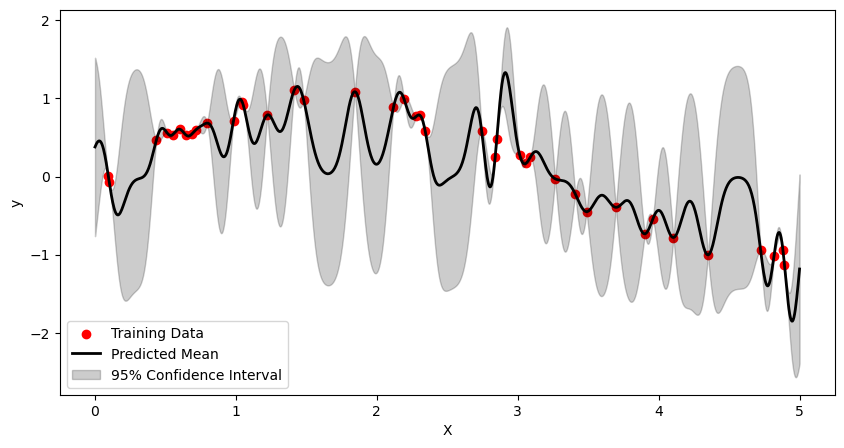

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split

# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to the data
y += 0.1 * np.random.randn(80)

# Define the kernel (RBF kernel)
kernel = 1.0 * RBF(length_scale=1.0)

# Create a Gaussian Process Regressor with the defined kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Fit the Gaussian Process model to the training data
gp.fit(X_train, y_train)

# Make predictions on the test data
y_pred, sigma = gp.predict(X_test, return_std=True)

# Visualize the results
x = np.linspace(0, 5, 1000)[:, np.newaxis]
y_mean, y_cov = gp.predict(x, return_cov=True)

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, c='r', label='Training Data')
plt.plot(x, y_mean, 'k', lw=2, zorder=9, label='Predicted Mean')
plt.fill_between(x[:, 0], y_mean - 1.96 * np.sqrt(np.diag(y_cov)), y_mean + 1.96 *
                 np.sqrt(np.diag(y_cov)), alpha=0.2, color='k', label='95% Confidence Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [55]:
np.random.seed(0)
n=50

kernel_ =[kernels.RBF (),

         kernels.RationalQuadratic(),

         kernels.ExpSineSquared(periodicity=10.0),

         kernels.DotProduct(sigma_0=1.0)**2,

         kernels.Matern()
         ]
print(kernel_, '\n')

[RBF(length_scale=1), RationalQuadratic(alpha=1, length_scale=1), ExpSineSquared(length_scale=1, periodicity=10), DotProduct(sigma_0=1) ** 2, Matern(length_scale=1, nu=1.5)] 



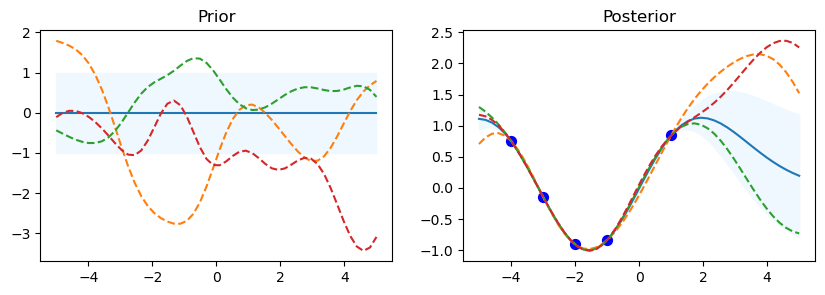

gp.kernel_ RBF(length_scale=1.93)
gp.log_marginal_likelihood: -3.4449378334621414
-------------------------------------------------- 




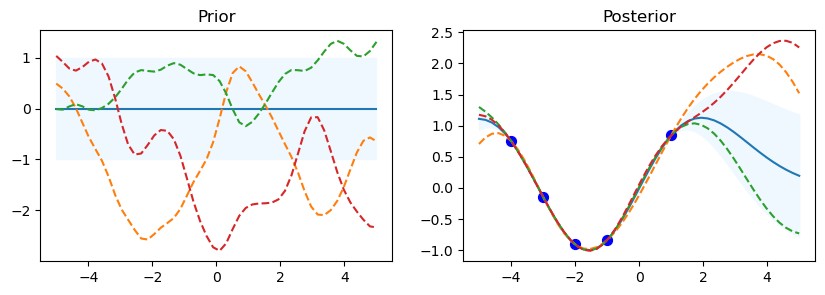

gp.kernel_ RationalQuadratic(alpha=1e+05, length_scale=1.93)
gp.log_marginal_likelihood: -3.444971892151338
-------------------------------------------------- 




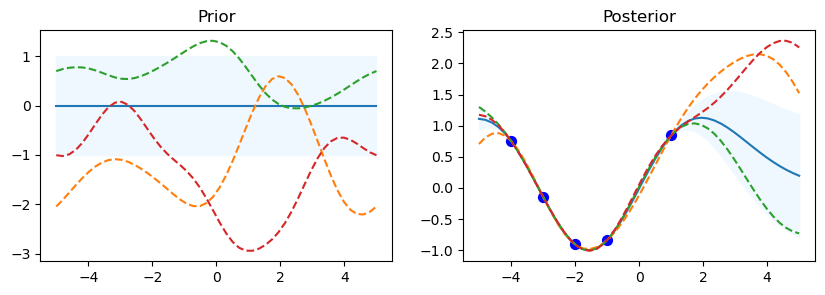

gp.kernel_ ExpSineSquared(length_scale=0.000524, periodicity=2.32e+04)
gp.log_marginal_likelihood: -3.444938145185029
-------------------------------------------------- 




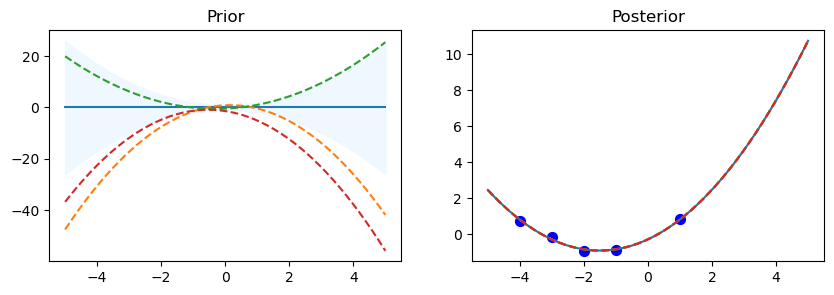

gp.kernel_ DotProduct(sigma_0=1) ** 2
gp.log_marginal_likelihood: -150226462.28027028
-------------------------------------------------- 




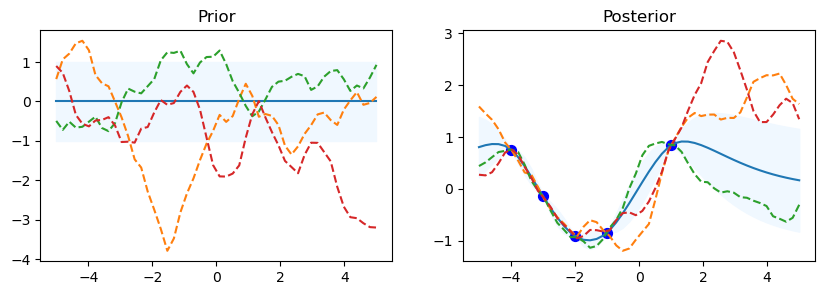

gp.kernel_ Matern(length_scale=1.99, nu=1.5)
gp.log_marginal_likelihood: -5.131637070524744
-------------------------------------------------- 




In [57]:
for kernel in kernel_:

    # Gaussian process

    gp = GaussianProcessRegressor(kernel=kernel)

    # Prior

    x_test = np.linspace(-5, 5, n).reshape(-1, 1)
    mu_prior, sd_prior = gp.predict(x_test, return_std=True)
    samples_prior = gp.sample_y(x_test, 3)

    # plot

    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.plot(x_test, mu_prior)
    plt.fill_between(x_test.ravel(), mu_prior - sd_prior,
                     mu_prior + sd_prior, color='aliceblue')
    plt.plot(x_test, samples_prior, '--')
    plt.title('Prior')

    # Fit

    x_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
    y_train = np.sin(x_train)
    gp.fit(x_train, y_train)

# posterior

    mu_post, sd_post = gp.predict(x_test, return_std=True)
    mu_post = mu_post.reshape(-1)
    samples_post = np.squeeze(gp.sample_y(x_test, 3))

    # plot

    plt.subplot(1, 2, 2)
    plt.plot(x_test, mu_post)
    plt.fill_between(x_test.ravel(), mu_post - sd_post,
                     mu_post + sd_post, color='aliceblue')
    plt.plot(x_test, samples_post, '--')
    plt.scatter(x_train, y_train, c='blue', s=50)
    plt.title('Posterior')

    plt.show()

    print('gp.kernel_', gp.kernel_)
    print('gp.log_marginal_likelihood:',
          gp.log_marginal_likelihood(gp.kernel_.theta))

    print('-'*50, '\n\n')

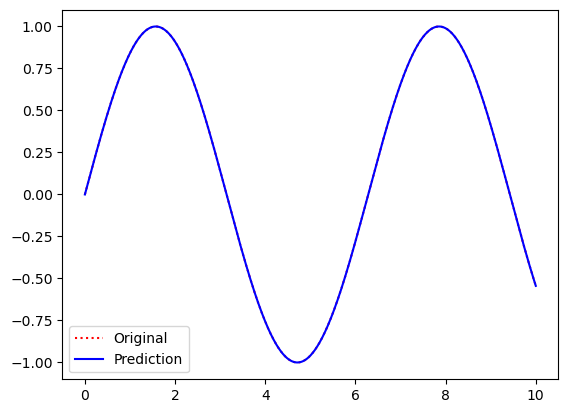

In [81]:
# Simple GPR model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Generate synthetic data
X = np.atleast_2d(np.linspace(0, 10, 1000)).T
y = np.sin(X).ravel()

# Kernel and model
kernel = C(1.0) * RBF(1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)



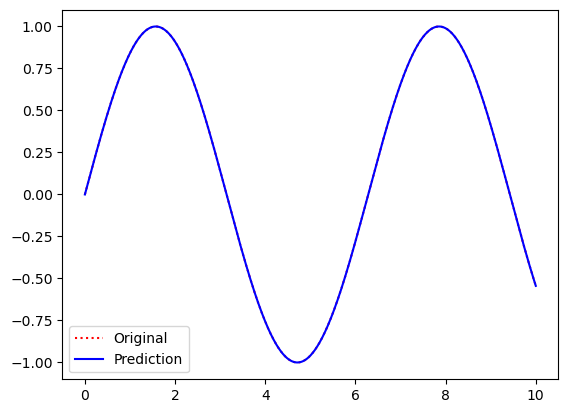

In [82]:
# Prediction
y_pred, sigma = gp.predict(X, return_std=True)
plt.plot(X, y, 'r:', label='Original')
plt.plot(X, y_pred, 'b-', label='Prediction')
plt.fill_between(X.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2)
plt.legend()
plt.show()

#### Time series forecasting using RNN in tensorflow
**Summary:**  
This page demonstrates how to use Recurrent Neural Networks (RNNs) for time series forecasting in TensorFlow. RNNs are designed to handle sequential data and can capture temporal dependencies. The tutorial covers data preparation, building and training an RNN model, and making predictions. It explains the advantages of RNNs for modeling time series with complex patterns and long-term dependencies.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [59]:

ticker = 'AAPL'  
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
data = data['Close'].values.reshape(-1, 1)
# Scale the data to the range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

[*********************100%***********************]  1 of 1 completed


In [60]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [62]:
model.fit(X_train, y_train, epochs=20, batch_size=64)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0872
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0017
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0012
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0011
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0010
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.4441e-04
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.0369e-04
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.6218e-04
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.3545e-04
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7.2611e-04
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.8401e-04
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.9355e-04
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.6613e-04
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 

In [63]:
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_unscaled, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_unscaled, predictions)

print(f"Unscaled Mean Squared Error (MSE): {mse}")
print(f"Unscaled Root Mean Squared Error (RMSE): {rmse}")
print(f"Unscaled Mean Absolute Error (MAE): {mae}")

Unscaled Mean Squared Error (MSE): 80.8682939067939
Unscaled Root Mean Squared Error (RMSE): 8.992680018036554
Unscaled Mean Absolute Error (MAE): 7.154218101501466


These values suggest that while the model is making reasonable predictions we can further fine tune like refining data preprocessing or using more advanced architectures like LSTM or GRU for better accuracy.

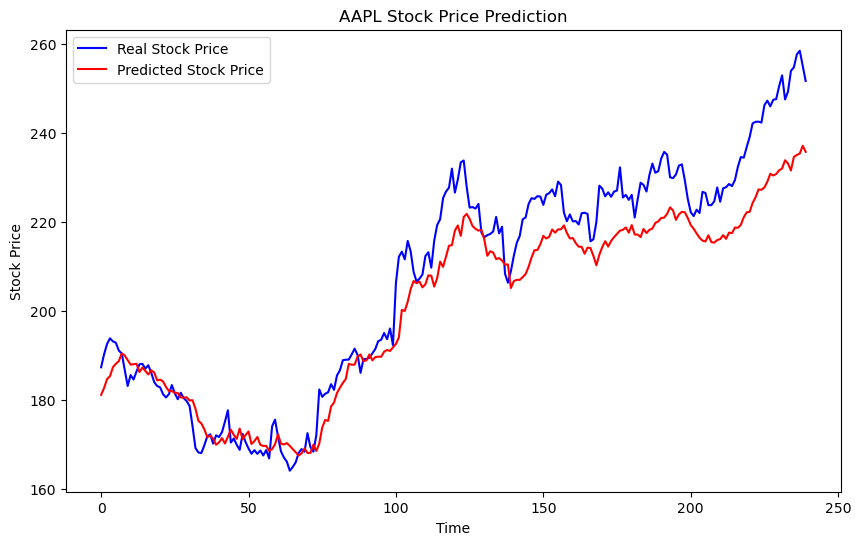

In [64]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

The graph shows the performance of a RNN model in predicting Apple (AAPL) stock prices. The blue line represents the actual stock prices from the test data while the red line shows the predicted values. The RNN model successfully captures the underlying trends in the stock price with the predicted values closely following the actual prices. Although minor deviations are observed the overall prediction shows that model effectively learned the temporal patterns in stock data.

In [83]:
# Simple RNN model 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate synthetic data
X = np.random.rand(100, 10, 1)
y = np.random.rand(100, 1)

# Build RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(10, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10)

# Predict
pred = model.predict(X)
print(pred)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1270  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1183 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1159 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1114 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1068 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1039
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1016
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0998
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0979 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0961 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.40951234]
 [0.5455193 ]
 [0.4724734 ]
 [0.39823985]
 [0.62387747]
 [0.31602028]
 [0.37151185]
 [0.56509745]
 [0.5757894 ]
 [0.6604004 ]
 [0.32137826]
 [0.5472847 ]
 [0.38172916]
 [0.57583135]
 [0.4387279 ]
 [0.46217468]
 [0.49334058]
 [0.28874797]
 [0.45435336]
 [0.39658222]
 [0.4558832 ]
 [0.4830881 ]
 [0.5573115 

#### **Multivariate Time Series Forecasting with LSTMs in Keras**
Multivariate Forecasting is a statistical technique to employ future values for multiple interconnected variables simultaneously. The process of multivariate forecasting begins by collecting historical data for all the features and then these datasets are analyzed to identify patterns, correlations based on relationships, and predict the future values.

Common techniques utilized in multivariate forecasting include Vector Autoregression (VAR), which models the interdependencies between multiple time series variables, and structural equation modeling (SEM), which allows for the examination of complex relationships between variables. Moreover, machine learning algorithms like neural networks and gradient boosting machines have also been increasingly employed in multivariate forecasting tasks due to their ability to capture intricate patterns and nonlinear relationships within data.

In [65]:
import datetime
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
import math
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(99)

In [66]:
# Dataset loading
dataFrame = pd.read_csv('final_data_adj.csv')  # https://github.com/SusmitSekharBhakta/Stock-market-price-prediction/blob/main/final_data_adj.csv

In [67]:
imputer = SimpleImputer(missing_values=np.nan)  # Handling missing values
dataFrame.drop(columns=['Date'], inplace=True)
dataFrame = pd.DataFrame(imputer.fit_transform(dataFrame), columns=dataFrame.columns)
dataFrame = dataFrame.reset_index(drop=True)
# Applying feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(dataFrame.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=list(dataFrame.columns))
# Scaling the target variables
target_scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled[['Open', 'Close']] = target_scaler.fit_transform(dataFrame[['Open', 'Close']].to_numpy())
df_scaled = df_scaled.astype(float)

##### Data preparation

A function called singleStepSampler is introduced to facilitate the preparation of the dataset for single-step time-series forecasting.

This function takes two parameters: a dataframe, denoted as df, and a specified window size. Within the function, two lists, namely xRes and yRes, are initialized to serve as containers for input features and target values, respectively. The function utilizes two nested loops to iterate over the rows of the dataframe, creating sequences of input features (xRes) and corresponding target values (yRes) based on the provided window size. The input features are structured as a sequence of windowed data points, where each data point is a list containing values from every column of the dataframe. Target values, sourced from the 'Open' and 'Close' columns for each window, are appended to yRes. 

In [68]:
# Single step dataset preparation
def singleStepSampler(df, window):
    xRes = []
    yRes = []
    for i in range(0, len(df) - window):
        res = []
        for j in range(0, window):
            r = []
            for col in df.columns:
                r.append(df[col][i + j])
            res.append(r)
        xRes.append(res)
        yRes.append(df[['Open', 'Close']].iloc[i + window].values)
    return np.array(xRes), np.array(yRes)

# Dataset splitting
SPLIT = 0.85
(xVal, yVal) = singleStepSampler(df_scaled, 20)
X_train = xVal[:int(SPLIT * len(xVal))]
y_train = yVal[:int(SPLIT * len(yVal))]
X_test = xVal[int(SPLIT * len(xVal)):]
y_test = yVal[int(SPLIT * len(yVal)):]

In [69]:
multivariate_lstm = keras.Sequential()
multivariate_lstm.add(keras.layers.LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2])))
multivariate_lstm.add(keras.layers.Dropout(0.2))
multivariate_lstm.add(keras.layers.Dense(2, activation='linear'))
multivariate_lstm.compile(loss = 'MeanSquaredError', metrics=['MAE'], optimizer='Adam')
multivariate_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 200)            │       172,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,202 (676.57 KB)

 Trainable params: 173,202 (676.57 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
history = multivariate_lstm.fit(X_train, y_train, epochs=20)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - MAE: 0.1322 - loss: 0.0368
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 0.0347 - loss: 0.0021
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 0.0316 - loss: 0.0017
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 0.0286 - loss: 0.0014
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - MAE: 0.0274 - loss: 0.0013
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - MAE: 0.0263 - loss: 0.0012
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 0.0248 - loss: 0.0011
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - MAE: 0.0253 - loss: 0.0012
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - MAE: 0.0244 - loss: 0.0010
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 0.0230 - loss: 9.1162e-04
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 0.0216 - loss: 8.1307e-04
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - MAE: 0.0218 - loss: 8.1990e-04
Epoch 13/20
48/48 ━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


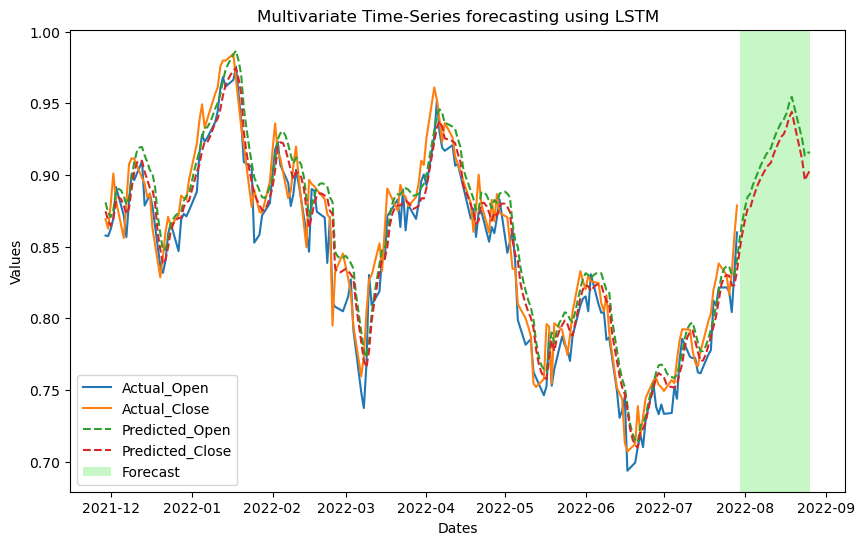

In [71]:
# Reload the data with the date index
dataFrame = pd.read_csv('final_data_adj.csv')  # Assuming the CSV file contains a 'Date' column
dataFrame['Date'] = pd.to_datetime(dataFrame['Date'])
dataFrame.set_index('Date', inplace=True)

# Forecast Plot with Dates on X-axis
predicted_values = multivariate_lstm.predict(X_test)

d = {
    'Predicted_Open': predicted_values[:, 0],
    'Predicted_Close': predicted_values[:, 1],
    'Actual_Open': y_test[:, 0],
    'Actual_Close': y_test[:, 1],
}

d = pd.DataFrame(d)
d.index = dataFrame.index[-len(y_test):]  # Assigning the correct date index

fig, ax = plt.subplots(figsize=(10, 6))
#  highlight the  forecast
highlight_start = int(len(d) * 0.9)  
highlight_end = len(d) - 1  # Adjusted to stay within bounds
# Plot the actual values
plt.plot(d[['Actual_Open', 'Actual_Close']][:highlight_start], label=['Actual_Open', 'Actual_Close'])

# Plot predicted values with a dashed line
plt.plot(d[['Predicted_Open', 'Predicted_Close']], label=['Predicted_Open', 'Predicted_Close'], linestyle='--')

# Highlight the forecasted portion with a different color
plt.axvspan(d.index[highlight_start], d.index[highlight_end], facecolor='lightgreen', alpha=0.5, label='Forecast')

plt.title('Multivariate Time-Series forecasting using LSTM')
plt.xlabel('Dates')
plt.ylabel('Values')
ax.legend()
plt.show()

In [72]:
# Model Evaluation
def eval(model):
    return {
        'MSE': sklearn.metrics.mean_squared_error(d[f'Actual_{model.split("_")[1]}'].to_numpy(), d[model].to_numpy()),
        'MAE': sklearn.metrics.mean_absolute_error(d[f'Actual_{model.split("_")[1]}'].to_numpy(), d[model].to_numpy()),
        'R2': sklearn.metrics.r2_score(d[f'Actual_{model.split("_")[1]}'].to_numpy(), d[model].to_numpy())
    }

result = dict()

for item in ['Predicted_Open', 'Predicted_Close']:
    result[item] = eval(item)

result

{'Predicted_Open': {'MSE': 0.0004324161092207757,
  'MAE': 0.017170061516862897,
  'R2': 0.8950604130913957},
 'Predicted_Close': {'MSE': 0.00031979207535319813,
  'MAE': 0.014295833415807294,
  'R2': 0.921263626104486}}

**we can see that for both the predictor variables the errors are very less and R2-score is high enough. It depicts that our LSTM model is performing very well but can perform better with hyper-parameter tuning and advance loss reduction.**

In [84]:
# Simple LSTM model for multivariate time series
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate synthetic data
X = np.random.rand(100, 10, 3)  # 3 features
y = np.random.rand(100, 1)

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(10, 3)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10)

# Predict
pred = model.predict(X)
print(pred)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3210
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2668
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2195
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1761
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1355
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1000 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0789
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0888 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1049
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0951 
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/stepWARNING:tensorflow:6 out of the last 17 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A73FBC3420> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) pas

#### Multivariate Time Series Forecasting with GRUs
**Summary:**  
This page introduces Gated Recurrent Units (GRUs), another variant of RNNs, for multivariate time series forecasting. GRUs are computationally efficient and can capture temporal dependencies similar to LSTMs. The tutorial explains how to prepare data, build a GRU model, and use it for forecasting. It discusses the benefits of GRUs for handling large datasets and their suitability for real-time forecasting applications.

In [73]:
# Dataset loading
url = 'https://raw.githubusercontent.com/SusmitSekharBhakta/Stock-market-price-prediction/main/final_data_adj.csv'

dataFrame = pd.read_csv(url)  
print(dataFrame.head())

# Data preprocessing
imputer = SimpleImputer(missing_values=np.nan)
dataFrame.drop(columns=['Date'], inplace=True)
dataFrame = pd.DataFrame(imputer.fit_transform(
    dataFrame), columns=dataFrame.columns)
dataFrame = dataFrame.reset_index(drop=True)
# Applying feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(dataFrame.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=list(dataFrame.columns))

target_scaler = MinMaxScaler(feature_range=(0, 1))

df_scaled[['Open', 'Close']] = target_scaler.fit_transform(
    dataFrame[['Open', 'Close']].to_numpy())

df_scaled = df_scaled.astype(float)
print(df_scaled.head())

#Dataset transformation 
# Single step dataset preparation
def singleStepSampler(df, window):
    xRes = []
    yRes = []
    for i in range(0, len(df) - window):
        res = []
        for j in range(0, window):
            r = []
            for col in df.columns:
                r.append(df[col][i + j])
            res.append(r)
        xRes.append(res)
        yRes.append(df[['Open', 'Close']].iloc[i + window].values)
    return np.array(xRes), np.array(yRes)

(xVal, yVal) = singleStepSampler(df_scaled, 20)

# Dataset splitting
SPLIT = 0.85

X_train = xVal[:int(SPLIT * len(xVal))]
y_train = yVal[:int(SPLIT * len(yVal))]
X_test = xVal[int(SPLIT * len(xVal)):]
y_test = yVal[int(SPLIT * len(yVal)):]

         Date         Open         High          Low        Close  \
0  2017-08-28  9907.150391  9925.750000  9882.000000  9912.799805   
1  2017-08-29  9886.400391  9887.349609  9783.750000  9796.049805   
2  2017-08-30  9859.500000  9909.450195  9850.799805  9884.400391   
3  2017-08-31  9905.700195  9925.099609  9856.950195  9917.900391   
4  2017-09-01  9937.650391  9983.450195  9909.849609  9974.400391   

     Adj Close    Volume        RSI       MACD    MACDsig  MACDhist  \
0  9912.799805  159600.0  55.406997  28.647258  28.317577  0.515867   
1  9796.049805  173300.0  55.406997  28.647258  28.317577  0.515867   
2  9884.400391  157800.0  55.406997  28.647258  28.317577  0.515867   
3  9917.900391  327700.0  55.406997  28.647258  28.317577  0.515867   
4  9974.400391  157800.0  55.406997  28.647258  28.317577  0.515867   

            SMA        CCI  Aroon Up  Aroon Down         Sadj  
0  12759.905212  24.363507       0.0         0.0          NaN  
1  12759.905212  24.363507    

##### Defining the model

- ```multivariate_gru = tf.keras.Sequential()```: Initializes a sequential model, which is a linear stack of layers.
- In this step, a multivariate Gated Recurrent Unit neural network model is defined using TensorFlow's Keras API. The model is initialized as a sequential model.
- It consists of a GRU layer with 200 units, taking input sequences with a shape defined by the number of features (columns) in the training data (X_train).
- A dropout layer is added to prevent overfitting and the output layer is a dense layer with 2 units, representing the predicted values for the two predictor variables ('Open' and 'Close').
- The activation function for this output layer is set to linear. The model is compiled using mean squared error as the loss function, and MAE and MSE as metrics for further evaluation.
- The Adam optimizer is used for training.
- The summary() method provides a summary of the model architecture, including the number of parameters and layer configurations.

In [74]:
multivariate_gru = tf.keras.Sequential()
multivariate_gru.add(
    tf.keras.layers.GRU(200, input_shape=(X_train.shape[1], X_train.shape[2])))
multivariate_gru.add(
    tf.keras.layers.Dropout(0.5))

# Output layer for two predictor variables
multivariate_gru.add(
    tf.keras.layers.Dense(2, activation='linear'))

# Compile the model
multivariate_gru.compile(loss='MeanSquaredError',
                         metrics=['MAE', 'MSE'],
                         optimizer=tf.keras.optimizers.Adam())
multivariate_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 200)            │       130,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,602 (510.16 KB)

 Trainable params: 130,602 (510.16 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
history = multivariate_gru.fit(X_train, y_train, epochs=20)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - MAE: 0.1676 - MSE: 0.0534 - loss: 0.0534
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - MAE: 0.0729 - MSE: 0.0090 - loss: 0.0090
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 0.0604 - MSE: 0.0061 - loss: 0.0061
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 0.0508 - MSE: 0.0045 - loss: 0.0045
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - MAE: 0.0452 - MSE: 0.0035 - loss: 0.0035
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 0.0440 - MSE: 0.0034 - loss: 0.0034
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 0.0413 - MSE: 0.0030 - loss: 0.0030
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 0.0439 - MSE: 0.0035 - loss: 0.0035
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - MAE: 0.0415 - MSE: 0.0031 - loss: 0.0031
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - MAE: 0.0414 - MSE: 0.0031 - loss: 0.0031
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - MAE: 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


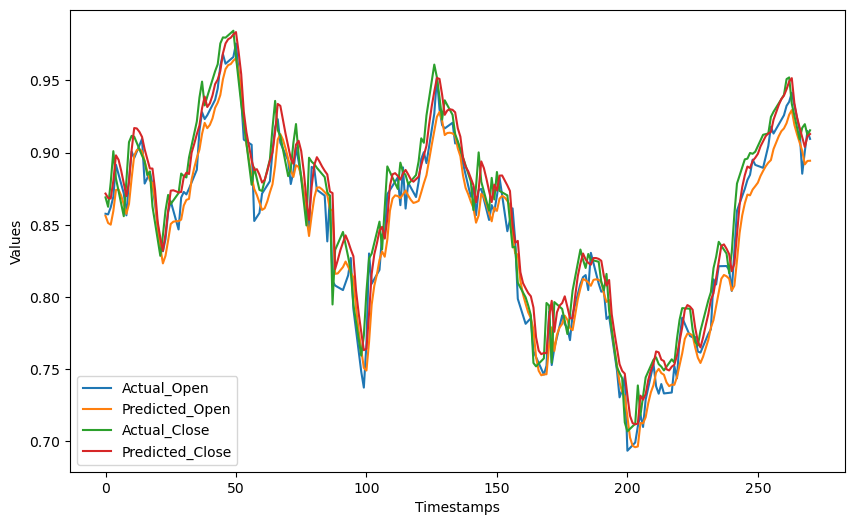

In [76]:
# Forecast Plot
predicted_values = multivariate_gru.predict(X_test)

d = {
    'Predicted_Open': predicted_values[:, 0],
    'Predicted_Close': predicted_values[:, 1],
    'Actual_Open': y_test[:, 0],
    'Actual_Close': y_test[:, 1],
}

d = pd.DataFrame(d)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(d[['Actual_Open', 'Predicted_Open']], label=['Actual_Open', 'Predicted_Open'])
plt.plot(d[['Actual_Close', 'Predicted_Close']], label=['Actual_Close', 'Predicted_Close'])
plt.xlabel('Timestamps')
plt.ylabel('Values')
ax.legend()
plt.show()

In [77]:
# Model Evaluation
def eval(model):
    return {
        'MSE': sklearn.metrics.mean_squared_error(d[f'Actual_{model.split("_")[1]}'].to_numpy(), d[model].to_numpy()),
        'MAE': sklearn.metrics.mean_absolute_error(d[f'Actual_{model.split("_")[1]}'].to_numpy(), d[model].to_numpy()),
        'R2': sklearn.metrics.r2_score(d[f'Actual_{model.split("_")[1]}'].to_numpy(), d[model].to_numpy())
    }

result = dict()

for item in ['Predicted_Open', 'Predicted_Close']:
    result[item] = eval(item)

result

{'Predicted_Open': {'MSE': 0.00016473304502002397,
  'MAE': 0.010019581332005747,
  'R2': 0.9600222625245173},
 'Predicted_Close': {'MSE': 0.00021445201552756997,
  'MAE': 0.011262365227087909,
  'R2': 0.9471995231320967}}

In [85]:
# Simple Multivariate GRU model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Generate synthetic data
X = np.random.rand(100, 10, 3)  # 3 features
y = np.random.rand(100, 1)

# Build GRU model
model = Sequential([
    GRU(50, activation='relu', input_shape=(10, 3)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10)

# Predict
pred = model.predict(X)
print(pred)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2996
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2439 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1966
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1567
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1242
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1003 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0869
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0824
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0818 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0810
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.57981634]
 [0.4834495 ]
 [0.6216755 ]
 [0.6264508 ]
 [0.5112711 ]
 [0.4955029 ]
 [0.5591113 ]
 [0.48360428]
 [0.55240387]
 [0.54377216]
 [0.4765681 ]
 [0.6134673 ]
 [0.57423216]
 [0.4923228 ]
 [0.5754994 ]
 [0.5171097 ]
 [0.5849416 ]
 [0.51439255]
 [0.5676576 ]
 [0.5157337 ]
 [0.6029531 ]
 [0.6066427 ]
 [0.63512325]
